In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [3]:
df = pd.read_parquet("C:/Users/jaycr/Downloads/sample_txn_data_2022.parquet")
df.head(10)

,dw_gc_header,business_date,fiscal_week_end,fiscal_week,fiscal_year,daypart_name,lineitem_sequence,lineitem_seq_parent,lineitem_description,parent_product_description,...,actmodqty,actdiscqty,actprodprice,actgrosssales,actnetsales,actpromosales,actdiscsales,acttax,dw_gc_header_2,token_primary_account_identifier
0,42188263563,2021-12-31,2022-01-04,Y2022 Q01 P01 W01,Y2022,EVENING,999,999,TAX-LINE,None,...,0.0,0,0.00,0.00,0.00,0.00,0.00,0.28,42188263563,0880344659239910
1,42188263563,2021-12-31,2022-01-04,Y2022 Q01 P01 W01,Y2022,EVENING,1,1,NON-COMBO-ITEM,Beefy 5-Layer Burrito,...,0.0,0,2.99,2.99,2.99,0.00,0.00,0.00,42188263563,0880344659239910
2,42188263563,2021-12-31,2022-01-04,Y2022 Q01 P01 W01,Y2022,EVENING,2,2,NON-COMBO-ITEM,Cheesy Bean and Rice Burrito,...,0.0,0,1.29,1.29,1.29,0.00,0.00,0.00,42188263563,0880344659239910
3,42201144646,2021-12-31,2022-01-04,Y2022 Q01 P01 W01,Y2022,BREAKFAST,999,999,TAX-LINE,None,...,0.0,0,0.00,0.00,0.00,0.00,0.00,0.31,42201144646,8819419820104328
4,42201144646,2021-12-31,2022-01-04,Y2022 Q01 P01 W01,Y2022,BREAKFAST,1,1,NON-COMBO-ITEM,Breakfast Crunchwrap - Bacon,...,0.0,0,3.49,3.49,3.49,0.00,0.00,0.00,42201144646,8819419820104328
5,42197843459,2021-12-31,2022-01-04,Y2022 Q01 P01 W01,Y2022,LUNCH,999,999,TAX-LINE,None,...,0.0,0,0.00,0.00,0.00,0.00,0.00,0.11,42197843459,8456488655739252
6,42197843459,2021-12-31,2022-01-04,Y2022 Q01 P01 W01,Y2022,LUNCH,1,1,NON-COMBO-ITEM,Cheesy Fiesta Potatoes,...,0.0,0,1.89,1.89,1.89,0.00,0.00,0.00,42197843459,8456488655739252
7,42188307845,2021-12-31,2022-01-04,Y2022 Q01 P01 W01,Y2022,AFTERNOON,999,999,TAX-LINE,None,...,0.0,0,0.00,0.00,0.00,0.00,0.00,1.01,42188307845,8504411087099781
8,42188307845,2021-12-31,2022-01-04,Y2022 Q01 P01 W01,Y2022,AFTERNOON,1,1,NON-COMBO-ITEM,Chicken Quesadilla,...,0.0,0,4.99,14.97,14.97,0.00,0.00,0.00,42188307845,8504411087099781
9,42188307845,2021-12-31,2022-01-04,Y2022 Q01 P01 W01,Y2022,AFTERNOON,2,2,NON-COMBO-ITEM,Soft Taco,...,0.0,0,1.89,1.89,1.89,0.00,0.00,0.00,42188307845,8504411087099781


In [4]:
df.loc[(df["dw_gc_header"]=="42211852126") & (df["lineitem_sequence"] == "999")]

,dw_gc_header,business_date,fiscal_week_end,fiscal_week,fiscal_year,daypart_name,lineitem_sequence,lineitem_seq_parent,lineitem_description,parent_product_description,...,actmodqty,actdiscqty,actprodprice,actgrosssales,actnetsales,actpromosales,actdiscsales,acttax,dw_gc_header_2,token_primary_account_identifier
10120,42211852126,2022-01-01,2022-01-04,Y2022 Q01 P01 W01,Y2022,DINNER,999,999,TAX-LINE,None,...,0.0,0,0.00,0.00,0.00,0.00,0.00,0.64,42211852126,2072614145892093
10121,42211852126,2022-01-01,2022-01-04,Y2022 Q01 P01 W01,Y2022,DINNER,999,999,TAX-LINE,None,...,0.0,0,0.00,0.00,0.00,0.00,0.00,0.64,42211852126,2072614145892093


In [5]:
dups = df[df.duplicated()]
dups.to_csv("Duplicated Rows in Dataset.csv")

In [6]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)


(1974588, 27)
(1957252, 27)


In [7]:
df.to_csv("sendhelp.csv")

In [8]:
#Users
user_df = df['token_primary_account_identifier']
user_df = user_df.drop_duplicates()
user_df.shape

(25000,)

In [9]:
#Transactions
transactioncols = ["dw_gc_header", "token_primary_account_identifier", "business_date","daypart_name","fiscal_week_end", "fiscal_week",
"fiscal_year","dw_gc_header_2"]
trans_df = df[transactioncols]
trans_df = trans_df.drop_duplicates()
trans_df.head(10)

,dw_gc_header,token_primary_account_identifier,business_date,daypart_name,fiscal_week_end,fiscal_week,fiscal_year,dw_gc_header_2
0,42188263563,0880344659239910,2021-12-31,EVENING,2022-01-04,Y2022 Q01 P01 W01,Y2022,42188263563
3,42201144646,8819419820104328,2021-12-31,BREAKFAST,2022-01-04,Y2022 Q01 P01 W01,Y2022,42201144646
5,42197843459,8456488655739252,2021-12-31,LUNCH,2022-01-04,Y2022 Q01 P01 W01,Y2022,42197843459
7,42188307845,8504411087099781,2021-12-31,AFTERNOON,2022-01-04,Y2022 Q01 P01 W01,Y2022,42188307845
11,42185146985,0761848206682093,2021-12-31,EVENING,2022-01-04,Y2022 Q01 P01 W01,Y2022,42185146985
18,42191627334,0674945516353208,2021-12-31,EVENING,2022-01-04,Y2022 Q01 P01 W01,Y2022,42191627334
25,42193166405,0503885983932948,2021-12-31,AFTERNOON,2022-01-04,Y2022 Q01 P01 W01,Y2022,42193166405
37,42199504126,807246599191004,2021-12-31,DINNER,2022-01-04,Y2022 Q01 P01 W01,Y2022,42199504126
43,42208730555,0915763119368468,2022-01-01,AFTERNOON,2022-01-04,Y2022 Q01 P01 W01,Y2022,42208730555
51,42206980337,0030552626326133,2022-01-01,AFTERNOON,2022-01-04,Y2022 Q01 P01 W01,Y2022,42206980337


In [10]:
#Lines
line_cols = ["dw_gc_header", "lineitem_sequence", "lineitem_seq_parent", "lineitem_description", "parent_product_code", "child_product_code", "modification_product_code"]
line_df = df[line_cols]
print(line_df.shape)
line_df = line_df.drop_duplicates()
print(line_df.shape)
line_df.head(10)

(1957252, 7)
(1957240, 7)


,dw_gc_header,lineitem_sequence,lineitem_seq_parent,lineitem_description,parent_product_code,child_product_code,modification_product_code
0,42188263563,999,999,TAX-LINE,N/A,N/A,N/A
1,42188263563,1,1,NON-COMBO-ITEM,B-5LYR,B-5LYR,N/A
2,42188263563,2,2,NON-COMBO-ITEM,BCBRC,BCBRC,N/A
3,42201144646,999,999,TAX-LINE,N/A,N/A,N/A
4,42201144646,1,1,NON-COMBO-ITEM,AMWPBC,AMWPBC,N/A
5,42197843459,999,999,TAX-LINE,N/A,N/A,N/A
6,42197843459,1,1,NON-COMBO-ITEM,P-CHFS,P-CHFS,N/A
7,42188307845,999,999,TAX-LINE,N/A,N/A,N/A
8,42188307845,1,1,NON-COMBO-ITEM,Q-CK,Q-CK,N/A
9,42188307845,2,2,NON-COMBO-ITEM,S-BF,S-BF,N/A


In [11]:
#LinesQty
lineqty_cols = ["dw_gc_header", "lineitem_sequence", "lineitem_seq_parent","actqtysold", "actpromoqty", "actmodqty", 
"actdiscqty", "actprodprice", "actgrosssales", "actnetsales", "actpromosales", "actdiscsales", "acttax"]
lineqty_df = df[lineqty_cols]
print(lineqty_df.shape)
duplicateRows = lineqty_df[lineqty_df.duplicated()]
lineqty_df = lineqty_df.drop_duplicates()
print(lineqty_df.shape)

duplicateRows

(1957252, 13)
(1957240, 13)


,dw_gc_header,lineitem_sequence,lineitem_seq_parent,actqtysold,actpromoqty,actmodqty,actdiscqty,actprodprice,actgrosssales,actnetsales,actpromosales,actdiscsales,acttax
28115,46964629602,999,999,0.00,0,0.0,0,0.00,0.00,0.00,0.00,0.00,1.31
28117,46964629602,1,1,1.00,0,0.0,0,2.69,2.69,2.69,0.00,0.00,0.00
28119,46964629602,2,2,1.00,0,0.0,0,2.69,2.69,2.69,0.00,0.00,0.00
28121,46964629602,7,6,0.00,0,1.0,0,0.00,0.00,0.00,0.00,0.00,0.00
28123,46964629602,12,4,1.00,0,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00
28125,46964629602,4,4,1.00,0,0.0,0,7.49,7.49,7.49,0.00,0.00,0.00
28127,46964629602,8,4,1.00,0,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00
28129,46964629602,6,4,1.00,0,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00
28131,46964629602,5,4,1.00,0,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00
28133,46964629602,9,4,1.00,0,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
#Products
parents_df = df[["parent_product_code", "parent_product_description"]]
parents_df = parents_df.rename(columns = {"parent_product_code":"product_code","parent_product_description":"product_description"})
parents_df["isModification"] = 0

children_df = df[["child_product_code", "child_product_description"]]
children_df = children_df.rename(columns = {"child_product_code":"product_code","child_product_description":"product_description"})
children_df["isModification"] = 0

mod_df = df[["modification_product_code", "modification_description"]]
mod_df = mod_df.rename(columns = {"modification_product_code":"product_code","modification_description":"product_description"})
mod_df["isModification"] = 1

prod_df = pd.concat([parents_df, children_df, mod_df])
prod_df = prod_df.drop_duplicates()
prod_df = prod_df[prod_df["product_code"]!= "N/A"]

print(prod_df.shape)
prod_df.head(100)



(1491, 3)


,product_code,product_description,isModification
1,B-5LYR,Beefy 5-Layer Burrito,0
2,BCBRC,Cheesy Bean and Rice Burrito,0
4,AMWPBC,Breakfast Crunchwrap - Bacon,0
6,P-CHFS,Cheesy Fiesta Potatoes,0
8,Q-CK,Chicken Quesadilla,0
...,...,...,...
653,TFBBTQ,Mountain Dew Baja Blast® Freeze - NO Tartar Sauce,0
675,SMBLST,Small Mountain Dew Baja Blast®,0
677,CB-WRP,Black Bean Crunchwrap Supreme®,0
696,SDSOUR,Reduced Fat Sour Cream,0


User Clustering Exploration Starts Here

In [13]:
##Data re: how many orders and what time of days 
trans_df_2 = trans_df
dayparts = ["DINNER","EVENING","LUNCH","BREAKFAST","AFTERNOON","LATE NIGHT"]
for d in dayparts:
    trans_df_2["is"+d] = np.where(trans_df["daypart_name"] == d, 1 ,0) 
trans_df_2.head(10)

trans_agg = trans_df_2.groupby("token_primary_account_identifier").agg({"dw_gc_header":"count","isDINNER":"sum","isEVENING":"sum","isLUNCH":"sum","isBREAKFAST":"sum","isAFTERNOON":"sum", "isLATE NIGHT":"sum"})
trans_agg = trans_agg.reset_index()
trans_agg = trans_agg.rename(columns={"dw_gc_header":"Order Count","isDINNER":"DINNER Count","isEVENING":"EVENING Count","isLUNCH":"LUNCH Count","isBREAKFAST":"BREAKFAST Count","isAFTERNOON":"AFTERNOON Count", 
"isLATE NIGHT":"LATE NIGHT Count"})

for d in dayparts:
    trans_agg["% " + d] = trans_agg[d + " Count"] / trans_agg["Order Count"]
    trans_agg.drop(columns=[d + " Count"], inplace=True)
trans_agg.head(10)

,token_primary_account_identifier,Order Count,% DINNER,% EVENING,% LUNCH,% BREAKFAST,% AFTERNOON,% LATE NIGHT
0,0000129864897916,11,0.181818,0.000000,0.272727,0.090909,0.454545,0.000000
1,0000151620129398,17,0.176471,0.000000,0.764706,0.000000,0.058824,0.000000
2,0000278839234218,3,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000
3,0000300486104112,1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0000674834806389,36,0.055556,0.000000,0.361111,0.444444,0.138889,0.000000
5,0000861938312564,2,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000
6,0000863902214032,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0000986616435386,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0001209774247241,9,0.222222,0.444444,0.000000,0.000000,0.000000,0.333333
9,0001535737580949,4,0.750000,0.000000,0.250000,0.000000,0.000000,0.000000


In [14]:
#Purchase $$$
#start by getting total order cost (pre-tax) by summing all line costs 
lineqty_df["actnetsales"] = lineqty_df["actnetsales"].astype("float64")
dollar_agg = lineqty_df.groupby("dw_gc_header").agg({"actnetsales":"sum"})
dollar_agg = dollar_agg.reset_index()
dollar_agg = dollar_agg.rename(columns={"actnetsales":"Total Order Cost"})
dollar_agg = pd.merge(dollar_agg, trans_df[["dw_gc_header","token_primary_account_identifier"]],on="dw_gc_header")

#Now we can aggregate by user
dollar_user_agg = dollar_agg.groupby("token_primary_account_identifier").agg({"Total Order Cost":"mean","Total Order Cost":"median"})
dollar_user_agg = dollar_user_agg.reset_index()
dollar_user_agg = dollar_user_agg.rename(columns={"Total Order Cost":"Avg Order Cost"})

dollar_user_agg.head(10)

,token_primary_account_identifier,Avg Order Cost
0,0000129864897916,13.570
1,0000151620129398,13.170
2,0000278839234218,9.450
3,0000300486104112,9.930
4,0000674834806389,5.050
5,0000861938312564,11.910
6,0000863902214032,23.140
7,0000986616435386,22.280
8,0001209774247241,15.990
9,0001535737580949,7.075


In [15]:
#Final dataframe to cluster
cluster_df = pd.merge(user_df, trans_agg, how="inner", on="token_primary_account_identifier")
cluster_df = pd.merge(cluster_df, dollar_user_agg, how="inner", on="token_primary_account_identifier")
cluster_df.head(20)

,token_primary_account_identifier,Order Count,% DINNER,% EVENING,% LUNCH,% BREAKFAST,% AFTERNOON,% LATE NIGHT,Avg Order Cost
0,0880344659239910,10,0.700000,0.200000,0.000000,0.000000,0.000000,0.100000,16.095
1,8819419820104328,24,0.250000,0.166667,0.083333,0.291667,0.208333,0.000000,5.840
2,8456488655739252,8,0.375000,0.000000,0.375000,0.125000,0.125000,0.000000,12.670
3,8504411087099781,61,0.049180,0.000000,0.459016,0.000000,0.491803,0.000000,16.860
4,0761848206682093,13,0.076923,0.384615,0.307692,0.000000,0.230769,0.000000,10.380
5,0674945516353208,5,0.200000,0.400000,0.000000,0.000000,0.000000,0.400000,16.680
6,0503885983932948,103,0.155340,0.000000,0.213592,0.000000,0.631068,0.000000,7.080
7,807246599191004,22,0.045455,0.136364,0.000000,0.818182,0.000000,0.000000,9.870
8,0915763119368468,57,0.228070,0.157895,0.175439,0.140351,0.280702,0.017544,9.380
9,0030552626326133,3,0.333333,0.000000,0.000000,0.000000,0.666667,0.000000,8.260


In [16]:
cluster_df.shape

(25000, 9)

c:\Users\jaycr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jaycr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jaycr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jaycr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

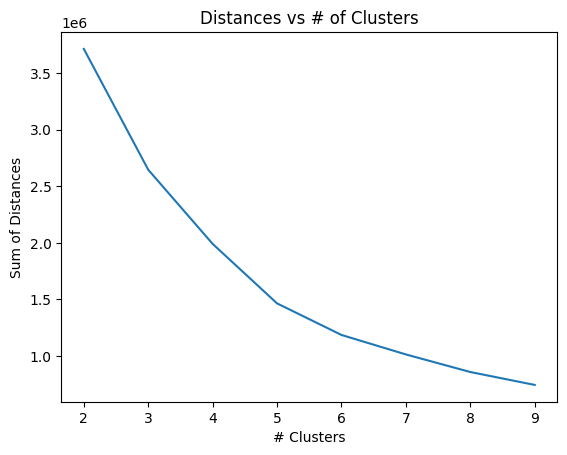

In [17]:
nClusters = range(2,10)
sumdistances = []
for n in nClusters:
    kmeans = KMeans(n_clusters=n).fit(cluster_df.loc[:, cluster_df.columns != 'token_primary_account_identifier'])
    sumdistances.append(kmeans.inertia_)
plt.plot(nClusters,sumdistances, '-')
plt.xlabel('# Clusters')
plt.ylabel('Sum of Distances')
plt.title('Distances vs # of Clusters')
plt.show()

In [18]:
lbl = ["Order Count", "% DINNER", "% EVENING", "% LUNCH", "% BREAKFAST", "% AFTERNOON", "% LATE NIGHT", "Avg Order Cost"]
cluster_output_df = pd.DataFrame(columns = ['Cluster Num']+lbl)
kmeans = KMeans(n_clusters=5).fit(cluster_df.loc[:, cluster_df.columns != 'token_primary_account_identifier'])

count = [0,0,0,0,0]
for x in kmeans.labels_:
    count[x]+=1
print(count)

cluster_output_df = pd.DataFrame(columns = lbl,data=kmeans.cluster_centers_)
cluster_output_df["Cluster Size"] = count
cluster_output_df

[1386, 13774, 5342, 4358, 140]


c:\Users\jaycr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Order Count,% DINNER,% EVENING,% LUNCH,% BREAKFAST,% AFTERNOON,% LATE NIGHT,Avg Order Cost,Cluster Size
0,48.536075,0.253548,0.117268,0.303237,0.115611,0.186566,0.023770,10.049329,1386
1,4.851545,0.278148,0.131869,0.280588,0.069515,0.206485,0.033396,10.028057,13774
2,20.251966,0.280585,0.120269,0.290376,0.090771,0.187910,0.030090,10.768711,5342
3,4.693169,0.394195,0.153154,0.198244,0.034165,0.183694,0.036549,23.843075,4358
4,122.385714,0.236345,0.119638,0.241649,0.169066,0.195777,0.037525,8.615321,140


In [19]:
print(sumdistances)

[3713184.3793447353, 2645967.2537267953, 1990946.4601506726, 1465356.1438868495, 1186569.6049475535, 1014506.4188554676, 859166.6799920672, 745232.0016730735]


Data Viz

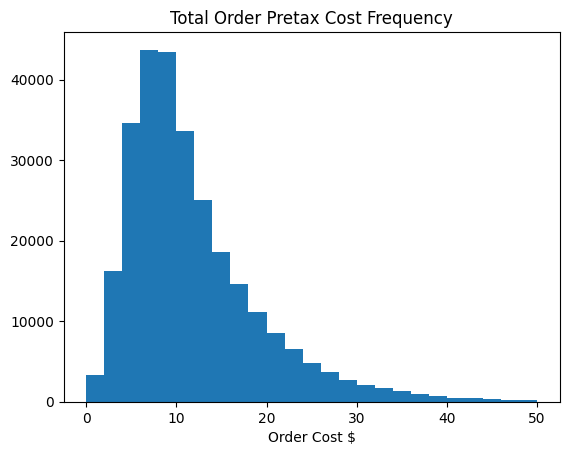

In [20]:
#Cost Frequency
plt.hist(dollar_agg["Total Order Cost"], range=[0,50],bins=25)
plt.title("Total Order Pretax Cost Frequency")
plt.xlabel("Order Cost $")
plt.show()

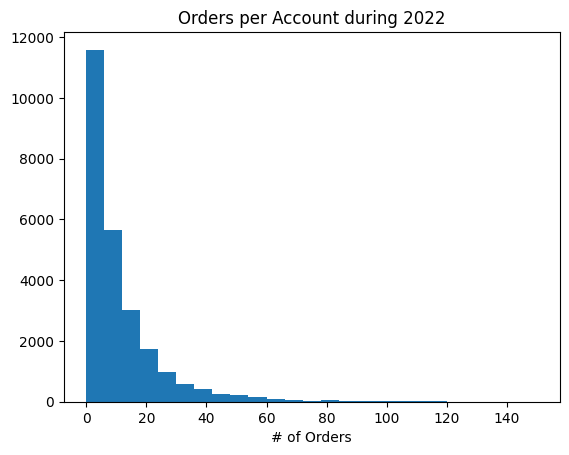

In [21]:
#Order count
plt.hist(cluster_df["Order Count"], range=[0,150],bins=25)
plt.title("Orders per Account during 2022")
plt.xlabel("# of Orders")
plt.show()

In [22]:
dollar_agg = lineqty_df.groupby("dw_gc_header").agg({"actnetsales":"sum"})
dollar_agg = dollar_agg.reset_index()
dollar_agg = dollar_agg.rename(columns={"actnetsales":"Total Order Cost"})
dollar_agg = pd.merge(dollar_agg, trans_df[["dw_gc_header","token_primary_account_identifier","daypart_name"]],on="dw_gc_header")
daypart_agg = dollar_agg.groupby("daypart_name").agg({"Total Order Cost":"mean"})
daypart_agg = daypart_agg.reset_index()
daypart_agg = daypart_agg.rename(columns={"Total Order Cost":"Avg Order Cost"})
daypart_agg

,daypart_name,Avg Order Cost
0,AFTERNOON,11.338709
1,BREAKFAST,8.500349
2,DINNER,13.914877
3,EVENING,12.883472
4,LATE NIGHT,13.031658
5,LUNCH,10.924510


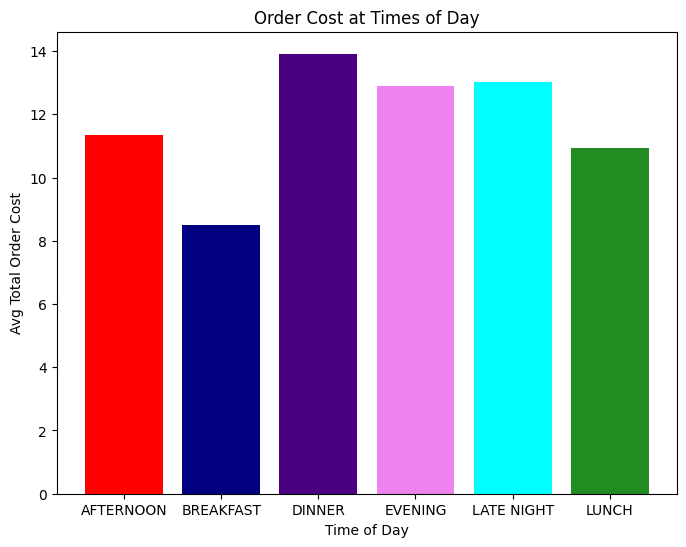

In [23]:

c = ['red','navy','indigo','violet','aqua','forestgreen']
plt.figure(figsize=(8,6))
plt.bar(daypart_agg["daypart_name"],daypart_agg["Avg Order Cost"],color=c)
plt.ylabel("Avg Total Order Cost")
plt.xlabel("Time of Day")
plt.title("Order Cost at Times of Day")
plt.show()

In [24]:
#line_df.to_csv("Lines.csv")
#trans_df.to_csv("Transactions.csv")
#lineqty_df.to_csv("LinesQty.csv")
#prod_df.to_csv("Products.csv")

In [25]:
fullline_cols = ["dw_gc_header", "lineitem_sequence", "lineitem_seq_parent", "lineitem_description", "parent_product_code", "child_product_code", "modification_product_code", "actqtysold", "actpromoqty", "actmodqty", 
"actdiscqty", "actprodprice", "actgrosssales", "actnetsales", "actpromosales", "actdiscsales", "acttax"]
fullline_df = df[fullline_cols]
duplicateRows = fullline_df[fullline_df.duplicated()]
fullline_df = fullline_df.drop_duplicates()
#ditch taxes
fullline_df = fullline_df[fullline_df["lineitem_seq_parent"]!= "999"]
fullline_df.head(10)

,dw_gc_header,lineitem_sequence,lineitem_seq_parent,lineitem_description,parent_product_code,child_product_code,modification_product_code,actqtysold,actpromoqty,actmodqty,actdiscqty,actprodprice,actgrosssales,actnetsales,actpromosales,actdiscsales,acttax
1,42188263563,1,1,NON-COMBO-ITEM,B-5LYR,B-5LYR,N/A,1.00,0,0.0,0,2.99,2.99,2.99,0.00,0.00,0.00
2,42188263563,2,2,NON-COMBO-ITEM,BCBRC,BCBRC,N/A,1.00,0,0.0,0,1.29,1.29,1.29,0.00,0.00,0.00
4,42201144646,1,1,NON-COMBO-ITEM,AMWPBC,AMWPBC,N/A,1.00,0,0.0,0,3.49,3.49,3.49,0.00,0.00,0.00
6,42197843459,1,1,NON-COMBO-ITEM,P-CHFS,P-CHFS,N/A,1.00,0,0.0,0,1.89,1.89,1.89,0.00,0.00,0.00
8,42188307845,1,1,NON-COMBO-ITEM,Q-CK,Q-CK,N/A,3.00,0,0.0,0,4.99,14.97,14.97,0.00,0.00,0.00
9,42188307845,2,2,NON-COMBO-ITEM,S-BF,S-BF,N/A,1.00,0,0.0,0,1.89,1.89,1.89,0.00,0.00,0.00
10,42188307845,3,3,NON-COMBO-ITEM,NOSAUC,NOSAUC,N/A,1.00,0,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00
12,42185146985,4,4,NON-COMBO-ITEM,BEAN,BEAN,N/A,1.00,0,0.0,0,1.49,1.49,1.49,0.00,0.00,0.00
13,42185146985,5,5,NON-COMBO-ITEM,T-BF,T-BF,N/A,1.00,0,0.0,0,1.49,1.49,1.49,0.00,0.00,0.00
14,42185146985,3,3,NON-COMBO-ITEM,LG-DEW,LG-DEW,N/A,1.00,0,0.0,0,2.19,2.19,2.19,0.00,0.00,0.00


In [26]:
no_mods_df = fullline_df[fullline_df["modification_product_code"]=="N/A"]
no_mods_df["actgrosssales"] = no_mods_df["actgrosssales"].astype("float")
no_mods_df.head(20)
#grosssales_agg = no_mods_df.agg({"actgrosssales":"sum"})
#grosssales_agg

C:\Users\jaycr\AppData\Local\Temp\ipykernel_13436\3216303920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_mods_df["actgrosssales"] = no_mods_df["actgrosssales"].astype("float")


,dw_gc_header,lineitem_sequence,lineitem_seq_parent,lineitem_description,parent_product_code,child_product_code,modification_product_code,actqtysold,actpromoqty,actmodqty,actdiscqty,actprodprice,actgrosssales,actnetsales,actpromosales,actdiscsales,acttax
1,42188263563,1,1,NON-COMBO-ITEM,B-5LYR,B-5LYR,N/A,1.00,0,0.0,0,2.99,2.99,2.99,0.00,0.00,0.00
2,42188263563,2,2,NON-COMBO-ITEM,BCBRC,BCBRC,N/A,1.00,0,0.0,0,1.29,1.29,1.29,0.00,0.00,0.00
4,42201144646,1,1,NON-COMBO-ITEM,AMWPBC,AMWPBC,N/A,1.00,0,0.0,0,3.49,3.49,3.49,0.00,0.00,0.00
6,42197843459,1,1,NON-COMBO-ITEM,P-CHFS,P-CHFS,N/A,1.00,0,0.0,0,1.89,1.89,1.89,0.00,0.00,0.00
8,42188307845,1,1,NON-COMBO-ITEM,Q-CK,Q-CK,N/A,3.00,0,0.0,0,4.99,14.97,14.97,0.00,0.00,0.00
9,42188307845,2,2,NON-COMBO-ITEM,S-BF,S-BF,N/A,1.00,0,0.0,0,1.89,1.89,1.89,0.00,0.00,0.00
10,42188307845,3,3,NON-COMBO-ITEM,NOSAUC,NOSAUC,N/A,1.00,0,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00
12,42185146985,4,4,NON-COMBO-ITEM,BEAN,BEAN,N/A,1.00,0,0.0,0,1.49,1.49,1.49,0.00,0.00,0.00
13,42185146985,5,5,NON-COMBO-ITEM,T-BF,T-BF,N/A,1.00,0,0.0,0,1.49,1.49,1.49,0.00,0.00,0.00
14,42185146985,3,3,NON-COMBO-ITEM,LG-DEW,LG-DEW,N/A,1.00,0,0.0,0,2.19,2.19,2.19,0.00,0.00,0.00


In [27]:
grosssales_by_prod_agg = no_mods_df.groupby("child_product_code").agg({"actgrosssales":"sum"})
grosssales_by_prod_agg = grosssales_by_prod_agg.reset_index()
grosssales_by_prod_agg.sort_values(by="actgrosssales",inplace=True, ascending=False)
grosssales_by_prod_agg.head(20)

,child_product_code,actgrosssales
549,Q-CK,162180.43
181,CMCQUE,137645.37
180,CMCHLP,100397.90
596,S-BF,95939.03
39,B-5LYR,84565.39
710,T-BF,81953.96
87,BEAN,78923.89
504,NBG-BF,78726.99
325,GDCRUN,78139.85
215,CR-WRP,73583.81


In [28]:
grosssales_agg = no_mods_df.agg({"actgrosssales":"sum"})
totsales = grosssales_agg[0]
grosssales_by_prod_agg["% of Total Sales"] = grosssales_by_prod_agg["actgrosssales"] / totsales
grosssales_by_prod_agg.rename(inplace=True, columns={"child_product_code":"product_code"})
sales_by_prod = pd.merge(grosssales_by_prod_agg, prod_df, how="inner", on="product_code") 
sales_by_prod.drop_duplicates(inplace=True, subset="product_code", keep="first")
sales_by_prod.head(125).agg({"% of Total Sales":"sum"})

% of Total Sales    0.952751
dtype: float64

In [29]:
#Separate into Breakfast & Not
no_mods_df = pd.merge(no_mods_df, trans_df_2, how="inner", on="dw_gc_header")
no_mods_bfast_df = no_mods_df[no_mods_df["isBREAKFAST"]==1]
no_mods_lunchdin_df = no_mods_df[no_mods_df["isBREAKFAST"]==0]
no_mods_bfast_df.head(20)

,dw_gc_header,lineitem_sequence,lineitem_seq_parent,lineitem_description,parent_product_code,child_product_code,modification_product_code,actqtysold,actpromoqty,actmodqty,...,fiscal_week_end,fiscal_week,fiscal_year,dw_gc_header_2,isDINNER,isEVENING,isLUNCH,isBREAKFAST,isAFTERNOON,isLATE NIGHT
2,42201144646,1,1,NON-COMBO-ITEM,AMWPBC,AMWPBC,N/A,1.00,0,0.0,...,2022-01-04,Y2022 Q01 P01 W01,Y2022,42201144646,0,0,0,1,0,0
91,42141770364,1,1,NON-COMBO-ITEM,AMWPSG,AMWPSG,N/A,2.00,0,0.0,...,2022-01-04,Y2022 Q01 P01 W01,Y2022,42141770364,0,0,0,1,0,0
118,42178447610,3,3,NON-COMBO-ITEM,LG-PEP,LG-PEP,N/A,1.00,0,0.0,...,2022-01-04,Y2022 Q01 P01 W01,Y2022,42178447610,0,0,0,1,0,0
119,42178447610,1,1,NON-COMBO-ITEM,AMWPSG,AMWPSG,N/A,2.00,0,0.0,...,2022-01-04,Y2022 Q01 P01 W01,Y2022,42178447610,0,0,0,1,0,0
120,42178447610,2,2,NON-COMBO-ITEM,THB-SG,THB-SG,N/A,1.00,0,0.0,...,2022-01-04,Y2022 Q01 P01 W01,Y2022,42178447610,0,0,0,1,0,0
165,42169214821,5,5,NON-COMBO-ITEM,S-BF,S-BF,N/A,2.00,0,0.0,...,2022-01-04,Y2022 Q01 P01 W01,Y2022,42169214821,0,0,0,1,0,0
166,42169214821,2,2,NON-COMBO-ITEM,T-BF,T-BF,N/A,3.00,0,0.0,...,2022-01-04,Y2022 Q01 P01 W01,Y2022,42169214821,0,0,0,1,0,0
167,42169214821,4,4,NON-COMBO-ITEM,NOSAUC,NOSAUC,N/A,1.00,0,0.0,...,2022-01-04,Y2022 Q01 P01 W01,Y2022,42169214821,0,0,0,1,0,0
168,42169214821,1,1,NON-COMBO-ITEM,AMWPSG,AMWPSG,N/A,1.00,0,0.0,...,2022-01-04,Y2022 Q01 P01 W01,Y2022,42169214821,0,0,0,1,0,0
177,42172829320,1,1,NON-COMBO-ITEM,BEAN,BEAN,N/A,1.00,0,0.0,...,2022-01-04,Y2022 Q01 P01 W01,Y2022,42172829320,0,0,0,1,0,0


In [30]:
#Breakfast agg
grosssales_by_prod_bfast_agg = no_mods_bfast_df.groupby("child_product_code").agg({"actgrosssales":"sum"})
grosssales_by_prod_bfast_agg = grosssales_by_prod_bfast_agg.reset_index()
grosssales_by_prod_bfast_agg.sort_values(by="actgrosssales",inplace=True, ascending=False)
grosssales_by_prod_bfast_agg.head(20)



,child_product_code,actgrosssales
36,BCMWRP,16927.91
5,AMWPBC,12580.44
7,AMWPSG,9702.79
58,BXBBCW,9406.11
8,AMWPST,8244.83
33,BCMGTB,6492.03
106,CTB-SG,6216.72
143,GTB-ST,5712.81
261,Q-CK,4977.37
59,BXBLBK,4377.78


In [31]:
#More Breakfast
grosssales_bfast_agg = no_mods_bfast_df.agg({"actgrosssales":"sum"})
totsales_bfast = grosssales_bfast_agg[0]
grosssales_by_prod_bfast_agg["% of Total Sales"] = grosssales_by_prod_bfast_agg["actgrosssales"] / totsales_bfast
grosssales_by_prod_bfast_agg.rename(inplace=True, columns={"child_product_code":"product_code"})
sales_by_bfast_prod = pd.merge(grosssales_by_prod_bfast_agg, prod_df, how="inner", on="product_code") 
sales_by_bfast_prod.drop_duplicates(inplace=True, subset="product_code", keep="first")
sales_by_bfast_prod.head(80).agg({"% of Total Sales":"sum"})

% of Total Sales    0.889589
dtype: float64

In [32]:
sales_by_bfast_prod.head(125).to_csv("Bfast Items.csv")

In [33]:
#Non-Breakfast
grosssales_by_prod_lunchdin_agg = no_mods_lunchdin_df.groupby("child_product_code").agg({"actgrosssales":"sum"})
grosssales_by_prod_lunchdin_agg = grosssales_by_prod_lunchdin_agg.reset_index()
grosssales_by_prod_lunchdin_agg.sort_values(by="actgrosssales",inplace=True, ascending=False)
grosssales_by_prod_lunchdin_agg.head(20)


,child_product_code,actgrosssales
541,Q-CK,157203.06
176,CMCQUE,133533.47
175,CMCHLP,96087.91
587,S-BF,92862.15
36,B-5LYR,81384.28
697,T-BF,79208.07
496,NBG-BF,76455.84
320,GDCRUN,75576.49
83,BEAN,75161.24
210,CR-WRP,71656.33


In [34]:
grosssales_lunchdin_agg = no_mods_lunchdin_df.agg({"actgrosssales":"sum"})
totsales_lunchdin = grosssales_lunchdin_agg[0]
grosssales_by_prod_lunchdin_agg["% of Total Sales"] = grosssales_by_prod_lunchdin_agg["actgrosssales"] / totsales_lunchdin
grosssales_by_prod_lunchdin_agg.rename(inplace=True, columns={"child_product_code":"product_code"})
sales_by_lunchdin_prod = pd.merge(grosssales_by_prod_lunchdin_agg, prod_df, how="inner", on="product_code") 
sales_by_lunchdin_prod.drop_duplicates(inplace=True, subset="product_code", keep="first")
sales_by_lunchdin_prod.head(80).agg({"% of Total Sales":"sum"})

% of Total Sales    0.911712
dtype: float64

In [35]:
sales_by_lunchdin_prod.head(125).to_csv("LunchDin Items.csv")

In [36]:
no_mods_df["actprodprice"] = no_mods_df["actprodprice"].astype(float)
no_mods_df["actqtysold"] = no_mods_df["actqtysold"].astype(float)
no_mods_df2 = no_mods_df[no_mods_df["actprodprice"]>0]
user_counts = no_mods_df2.groupby(["child_product_code","token_primary_account_identifier"]).agg({"actgrosssales":"sum","actqtysold":"sum"})
user_counts.reset_index(inplace=True)
user_counts =user_counts.rename(columns={"child_product_code":"product_code"})
user_counts.head(10)

,product_code,token_primary_account_identifier,actgrosssales,actqtysold
0,10P-CK,0087005355149853,18.99,1.0
1,10P-CK,8270506002238880,13.99,1.0
2,12CHNK,7468349441276572,4.99,1.0
3,12FHML,0241251836274713,69.98,2.0
4,16FHML,8082585392616035,171.96,4.0
5,1P-ML,0159413906373214,6.89,1.0
6,2-BISC,074862451991007,1.99,1.0
7,2-BISC,8151219540307086,1.59,1.0
8,2-BISC,8275717809243327,1.89,1.0
9,2-BISC,8826170588071922,2.29,1.0


In [37]:
iteminorder = no_mods_df2[["token_primary_account_identifier","dw_gc_header","child_product_code"]]
iteminorder.drop_duplicates(inplace=True)
user_orders_agg = iteminorder.groupby(["token_primary_account_identifier","child_product_code"]).agg({"dw_gc_header":"count"})
user_orders_agg.reset_index(inplace=True)
user_orders_agg.rename(columns={"child_product_code":"product_code","dw_gc_header":"# of Inclusions"},inplace=True)
user_orders_agg.head(20)

C:\Users\jaycr\AppData\Local\Temp\ipykernel_13436\2281859391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iteminorder.drop_duplicates(inplace=True)


,token_primary_account_identifier,product_code,# of Inclusions
0,0000129864897916,B-5LYR,2
1,0000129864897916,B-BFML,1
2,0000129864897916,B-CDBC,1
3,0000129864897916,BCBRC,1
4,0000129864897916,BEAN,1
5,0000129864897916,CR-WRP,9
6,0000129864897916,L-BLST,1
7,0000129864897916,LG-PEP,1
8,0000129864897916,LGBLST,10
9,0000129864897916,NACHOS,1


In [38]:
user_fav = user_counts.groupby("token_primary_account_identifier").agg({"actgrosssales":"max"})
user_fav.reset_index(inplace=True)
user_fav = pd.merge(user_fav,user_counts, on=["actgrosssales","token_primary_account_identifier"],how="inner")
user_fav.drop_duplicates(subset="token_primary_account_identifier", keep="first", inplace=True)
user_fav = pd.merge(user_fav, prod_df,how="inner",on="product_code")
user_fav.drop_duplicates(subset=["product_code","token_primary_account_identifier"], keep="first", inplace=True)
user_fav.head(20)

,token_primary_account_identifier,actgrosssales,product_code,actqtysold,product_description,isModification
0,0000129864897916,86.81,CR-WRP,19.0,Crunchwrap Supreme®,0
2,0003692821699382,23.35,CR-WRP,5.0,Crunchwrap Supreme®,0
4,0008108302131784,9.58,CR-WRP,2.0,Crunchwrap Supreme®,0
6,0012691225416239,88.53,CR-WRP,17.0,Crunchwrap Supreme®,0
8,0015061997093822,24.55,CR-WRP,5.0,Crunchwrap Supreme®,0
10,0024202316845144,9.18,CR-WRP,2.0,Crunchwrap Supreme®,0
12,0024886105849856,16.07,CR-WRP,3.0,Crunchwrap Supreme®,0
14,0026402215329035,85.23,CR-WRP,17.0,Crunchwrap Supreme®,0
16,0027632861823561,79.64,CR-WRP,16.0,Crunchwrap Supreme®,0
18,0030227492440596,9.18,CR-WRP,2.0,Crunchwrap Supreme®,0


In [39]:
fav_frequency = pd.merge(user_fav,cluster_df,on="token_primary_account_identifier",how="inner")
fav_frequency = pd.merge(fav_frequency,user_orders_agg,on=["token_primary_account_identifier","product_code"],how="inner")
fav_frequency["% of Orders w Favored Item"] = fav_frequency["# of Inclusions"] / fav_frequency["Order Count"]
fav_frequency.head(10)


,token_primary_account_identifier,actgrosssales,product_code,actqtysold,product_description,isModification,Order Count,% DINNER,% EVENING,% LUNCH,% BREAKFAST,% AFTERNOON,% LATE NIGHT,Avg Order Cost,# of Inclusions,% of Orders w Favored Item
0,0000129864897916,86.81,CR-WRP,19.0,Crunchwrap Supreme®,0,11,0.181818,0.000000,0.272727,0.090909,0.454545,0.0,13.570,9,0.818182
1,0003692821699382,23.35,CR-WRP,5.0,Crunchwrap Supreme®,0,3,0.666667,0.000000,0.000000,0.000000,0.333333,0.0,16.160,3,1.000000
2,0008108302131784,9.58,CR-WRP,2.0,Crunchwrap Supreme®,0,2,0.500000,0.000000,0.500000,0.000000,0.000000,0.0,11.175,2,1.000000
3,0012691225416239,88.53,CR-WRP,17.0,Crunchwrap Supreme®,0,21,0.666667,0.047619,0.238095,0.000000,0.047619,0.0,7.470,16,0.761905
4,0015061997093822,24.55,CR-WRP,5.0,Crunchwrap Supreme®,0,6,0.333333,0.000000,0.333333,0.166667,0.166667,0.0,9.175,5,0.833333
5,0024202316845144,9.18,CR-WRP,2.0,Crunchwrap Supreme®,0,2,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,16.530,1,0.500000
6,0024886105849856,16.07,CR-WRP,3.0,Crunchwrap Supreme®,0,6,0.500000,0.000000,0.000000,0.000000,0.500000,0.0,10.795,3,0.500000
7,0026402215329035,85.23,CR-WRP,17.0,Crunchwrap Supreme®,0,18,0.388889,0.444444,0.055556,0.000000,0.111111,0.0,11.975,14,0.777778
8,0027632861823561,79.64,CR-WRP,16.0,Crunchwrap Supreme®,0,22,0.045455,0.000000,0.954545,0.000000,0.000000,0.0,9.140,13,0.590909
9,0030227492440596,9.18,CR-WRP,2.0,Crunchwrap Supreme®,0,5,0.600000,0.400000,0.000000,0.000000,0.000000,0.0,7.480,2,0.400000


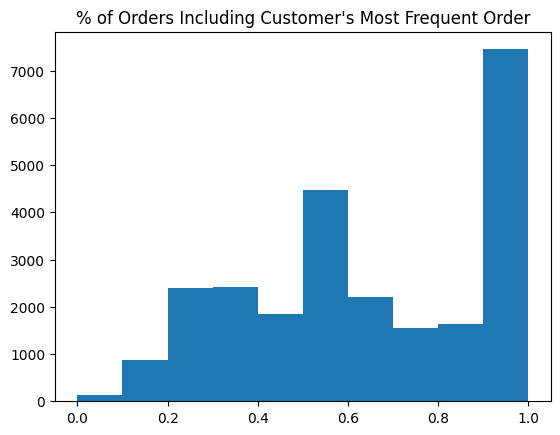

In [40]:
plt.hist(fav_frequency["% of Orders w Favored Item"], range=[0,1],bins=10)
plt.title("% of Orders Including Customer's Most Frequent Order")
plt.show()

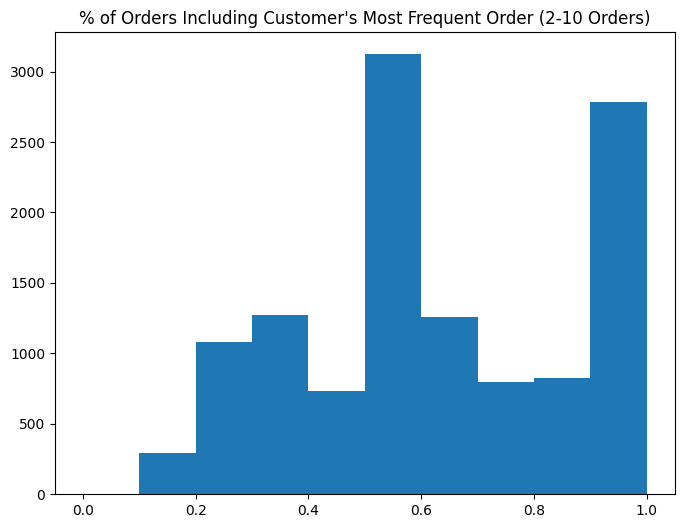

In [41]:
plt.figure(figsize=(8,6))
fav_frequency = fav_frequency[fav_frequency["Order Count"]>1]
plt.hist(fav_frequency[fav_frequency["Order Count"]<10]["% of Orders w Favored Item"], range=[0,1],bins=10)
plt.title("% of Orders Including Customer's Most Frequent Order (2-10 Orders)")
plt.show()


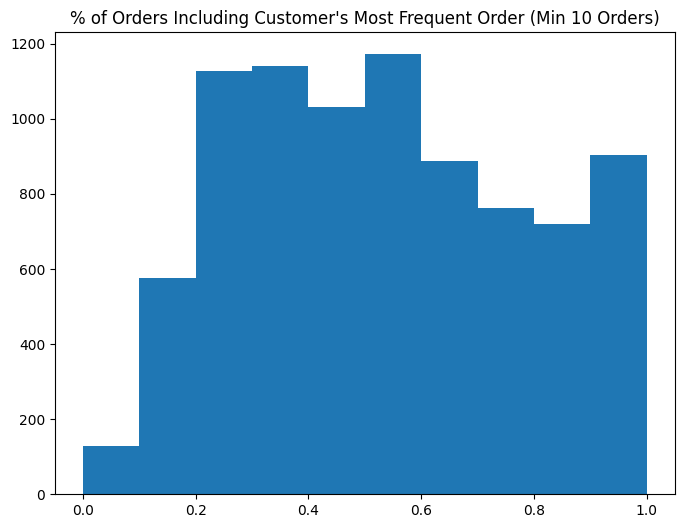

In [42]:
plt.figure(figsize=(8,6))
plt.hist(fav_frequency[fav_frequency["Order Count"]>10]["% of Orders w Favored Item"], range=[0,1],bins=10)
plt.title("% of Orders Including Customer's Most Frequent Order (Min 10 Orders)")
plt.show()


In [43]:
fav_frequency[fav_frequency["Order Count"]<fav_frequency["# of Inclusions"]].head(10)

,token_primary_account_identifier,actgrosssales,product_code,actqtysold,product_description,isModification,Order Count,% DINNER,% EVENING,% LUNCH,% BREAKFAST,% AFTERNOON,% LATE NIGHT,Avg Order Cost,# of Inclusions,% of Orders w Favored Item


<Figure size 800x600 with 0 Axes>

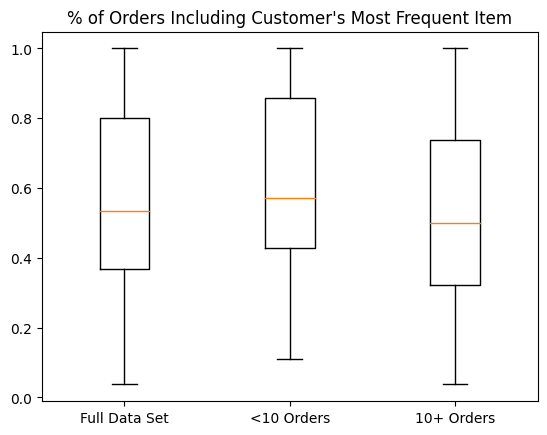

In [44]:
plt.figure(figsize=(8,6))
boxplotdata = {"Full Data Set":fav_frequency["% of Orders w Favored Item"], "<10 Orders":fav_frequency[fav_frequency["Order Count"]<10]["% of Orders w Favored Item"], "10+ Orders":fav_frequency[fav_frequency["Order Count"]>=10]["% of Orders w Favored Item"]}
fig, ax = plt.subplots()
ax.boxplot(boxplotdata.values())
ax.set_xticklabels(boxplotdata.keys())
plt.title("% of Orders Including Customer's Most Frequent Item")
plt.show()


In [45]:
trans_df.shape

(279866, 14)